# Bayesian Regression
 
This notebook solves the assignment given in Homework 5 of the Foundations of Machine Learning [course](https://bloomberg.github.io/foml/#lectures).

**Goal: Recreating figure 3.7 from Bishop's "Pattern Recognition and Machine Learning."**

This notebook provides scaffolding for your exploration of Bayesian Linear Gaussian Regression, as described in the [Lecture](https://bloomberg.github.io/foml/#lectures).
In particular, through this notebook you will reproduce several variants of figure 3.7 from Bishop's book.

## Introduction


### General note on conditional Probability Models
We have n inputs $x_1,...,x_n \in X$  
For each input $x_i$ we observe $y_i$ sampled randomly from $p(y| x_i, \theta)$  
We assume the outcomes $y_1,...,y_n$ are independent
   
The probability density for our data $D$ is: $$p(D| x_1,...,x_n, \theta) = \prod_{i=1}^n p(y_i| x_i, \theta)$$  

For fixed $D$, the function $\theta \to p(D|x,\theta)$ is the likelihood function: $$L_D (\theta)$$  


The maximum likelihood estimator (MLE) for $\theta$ in the model $\{p(y|x,\theta) | \theta \in \Theta\}$ is  

$$\hat{\theta}_{MLE} = argmax_{\theta \in \Theta} L_D (\theta) $$

### Gaussian Linear Regression: 

The input space is $X = R^d$, outcome space is $Y = R$  
  
We use the family of conditional probability densities   
$$ y|x,w \sim N(w^Tx, \sigma ^2),$$ for some known $\sigma^2$.  
  
The likelihood of $w \in R^d$ for the data $D$ is given by the likelihood function:  
$$p(D| x_1,...,x_n, \theta) = \prod_{i=1}^n p(y_i| x_i, \theta)$$ 

$$p(D| x_1,...,x_n, \theta) = \prod_{i=1}^n \left [\frac{1}{\sigma \sqrt{2\pi}} exp\left(-\frac{(y_i - w^Tx_i)^2}{2\sigma^2}\right) \right]$$   


The MLE is:  
$$\begin{align}
\hat{w}_{MLE} & = argmax_{w \in R^d} L_D (\theta) \\
  & = argmin_{w \in R^d} \sum_{i=1}^n (y_i - w^Tx_i)^2\\
\end{align}$$  


### Bayesian Conditional Models: 

Two components:
- A parametric family of conditional densities: $\{p(y| x_i, \theta) : \theta \in \Theta\}$
- A prior distribution for $\theta \in \Theta$ : $p(\theta)$ on $\theta \in \Theta$  

  
The posterior distribution for $\theta$ is:  
$$\begin{align}
p(\theta| D, x_1,...,x_n) & \propto p(D| x_1,...,x_n, \theta) \times p(\theta) \\ 
& = L_D (\theta) p(\theta) \\
\end{align}$$  
  
If we choose a Gaussian prior distribution $p(w)$ on $R^d$:  
$$ w \sim N(0, \Sigma_0)$$  

Then the posterior distribution is:  

$$\begin{align}
p(w| D, x_1,...,x_n) & \propto  p(D| x_1,...,x_n, w) \times p(w) \\
& =  \prod_{i=1}^n \left [\frac{1}{\sigma \sqrt{2\pi}} exp\left(-\frac{(y_i - w^Tx_i)^2}{2\sigma^2}\right) \right] \text{(likelihood)}\\
& \times |2\pi\Sigma_0|^{-\frac{1}{2}} exp \left(-\frac{1}{2}w^T \Sigma_0^{-1}w\right) \text{(prior)}\\
\end{align}$$

#### Closed form for posterior:

Model:  
$$w \sim N(0,\Sigma_0)$$  
$$ y_i|x,w \text{  i.i.d.  } N(w^Tx, \sigma ^2)$$ 

The posterior distribution is a Gaussian distribution:

$$\begin{align}
w|D & \sim  N(\mu_p,\Sigma_p) \\
 \mu_p & =  (X^TX + \sigma^2 \Sigma_0^{-1})^{-1}X^Ty \text{    (MAP and posterior mean)}\\
 \Sigma_p & = (\sigma^{-2}X^TX + \Sigma_0^{-1})^{-1}\\
\end{align}$$

  
For the prior variance $\Sigma_0 = \frac{\sigma^2}{\lambda}I$, we get:  
$$\mu_p  =  (X^TX + \lambda I)^{-1}X^Ty$$
which is the ridge regression solution.  

#### Predictive distribution:
  
Given a new input point $x_{new}$, we want to predict $y_{new}$:  
Predictive distribution:  
$$\begin{align}
p(y_{new}|x_{new},D) & =  \int p(y_{new}|x_{new},w,D)p(w|D)dw \\
 & =  \int p(y_{new}|x_{new},w)p(w|D)dw\\
\end{align}$$  
Averages over prediction for each w, weighted by posterior distribution.
  
For Gaussian regression, the predictive distribution has a closed form:  
$$\begin{align}
y_{new}|x_{new},D & \sim  N(\eta_{new},\sigma_{new}) \\
 \eta_{new} & =  \mu_P^Tx_{new} \\
 \sigma_{new} & = x_{new}^T \Sigma_Px_{new} + \sigma^2\\
\end{align}$$  
  
With predictive distributions, we can we mean prediction with error bands.

## Python implementation:


Implement the functions in `problem` -- completed implementations of these functions are needed to generate the plots.

In [1]:
from support_code import *
from problem import *

If your implementations are correct, then the next few code blocks in this notebook will generate the required variants of Bishop's figure. These are the same figures that you would obtain if you ran `python problem.py` from the command line -- this notebook is just provided as additional support.

In [2]:
# Generate our simulated dataset
# Note we are using sigma == 0.2

np.random.seed(46134)
actual_weights = np.matrix([[0.3], [0.5]])
data_size = 40
noise = {"mean":0, "var":0.2 ** 2}
likelihood_var = noise["var"]
xtrain, ytrain = generate_data(data_size,
                               noise,
                               actual_weights)

Next, we generate the plots using 3 different prior covariance matrix. In the main call to `problem.py`, this is done in a loop -- here we wrap the loop body in a short helper function.

In [3]:
def make_plot_given_sigma(sigma_squared):
    prior = {"mean":np.matrix([[0], [0]]),
             "var":matlib.eye(2) * sigma_squared}

    make_plots(actual_weights,
               xtrain,
               ytrain,
               likelihood_var,
               prior,
               likelihood_func,
               get_posterior_params,
               get_predictive_params)

In [4]:
sigmas = [1/2, 1/(2**5), 1/(2**10)]

### First covariance matrix:
$$\Sigma_{0} = \frac{1}{2}I,\qquad{} I \in \mathbb{R}^{2 \times 2}$$

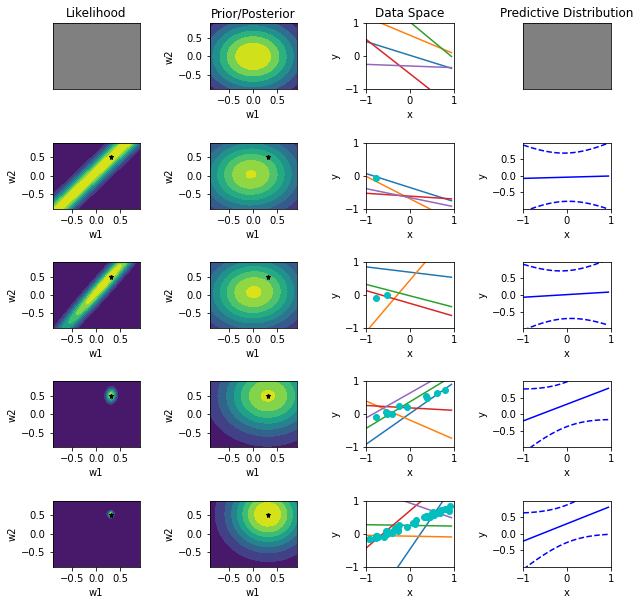

In [5]:
try:
    make_plot_given_sigma(sigmas[0])
except NameError:
    print('If not yet implemented, implement functions in problem.py.')
    print('If you have implemented, remove this try/except.')

### Second covariance matrix:
$$\Sigma_{0} = \frac{1}{2^{5}}I,\qquad{} I \in \mathbb{R}^{2 \times 2}$$

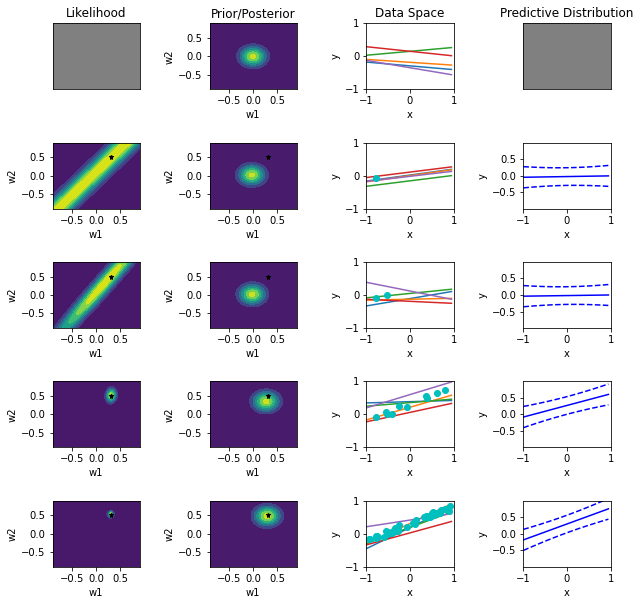

In [6]:
try:
    make_plot_given_sigma(sigmas[1])
except NameError:
    print('If not yet implemented, implement functions in problem.py.')
    print('If you have implemented, remove this try/except.')

### Third covariance matrix:
$$\Sigma_{0} = \frac{1}{2^{10}}I,\qquad{} I \in \mathbb{R}^{2 \times 2}$$

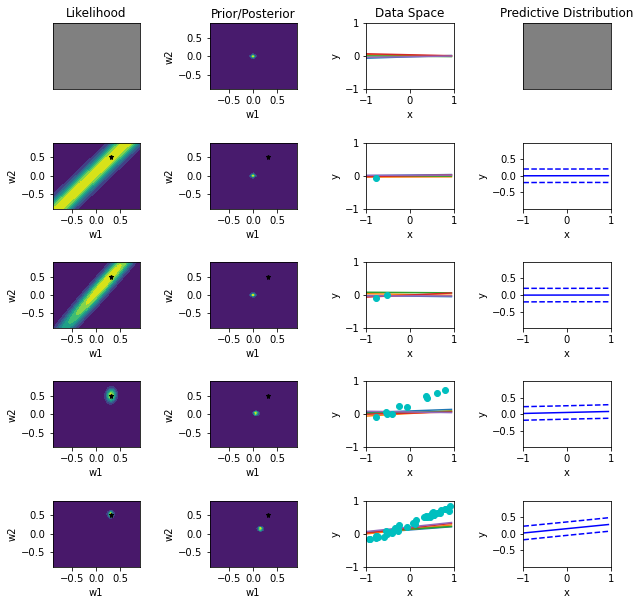

In [7]:
try:
    make_plot_given_sigma(sigmas[2])
except NameError:
    print('If not yet implemented, implement functions in problem.py.')
    print('If you have implemented, remove this try/except.')

### Comments

The first row of each figure corresponds to the situation before any data points are observed and shows a plot of the prior distribution in w space together with  samples of the function $y(x, w)$ in which the values of $w$ are drawn from the prior. 
The true values (w1,w2) of w used to generate the data are plotted as a black star on the likelihood and the prior/posterior plots.
In the second row, we see the situation after observing a single data point (blue round marker). The likelihood function provides a soft constraint that the line must pass close to the data point, where close is determined by the noise precision. When we multiply this likelihood function by the prior from the top row, and normalize, we
obtain the posterior distribution shown in the middle plot on the second row. Samples of the regression function $y(x, w)$ obtained by drawing samples of $w$ from this posterior distribution are shown in the right-hand plot.  

Then each successive row includes more data points (last row is on the complete dataset, 40 points).

When the sample size increase, the likelihood becomes sharper and centers around the true value of w.


**<font size="3">When the covariance matrix is large (weak prior):</font>** 

- The posterior distribution become slighlty sharper with increasing sample size, and centers on the true value of the parameter w. However, the broadness of the distribution results in a posterior predictive distribution with large error bands.

**<font size="3"> When the covariance matrix is small (strong prior):</font>**

- This corresponds to a case of high regularization. The posterior distribution is mainly influenced by the prior. It is a sharp distribution and doesn't capture the true value of the parameter w even as the sample size increases. It results in a predictive distribution with small error bands but that does not capture the true relationship in the data. (Underfitting)

**<font size="3"> When the covariance matrix is intermediate size (medium strength prior):</font>**

- The posterior distribution is slightly influenced by the prior but as the sample size increases, it centers around the true value of the parameter w. The posterior predictive distribution has smaller error bands than when the prior is weak. It captures the true relationship in the data.


## Finding the MAP solution

Our work above was very much “full Bayes”, in that rather than coming up with a single prediction function, we have a whole distribution over posterior prediction functions. However, sometimes we want a single prediction function, and a common approach is to use the MAP estimate – that is, choose the prediction function that has the highest posterior likelihood.   
For this setting, we can get the MAP estimate using ridge regression.  
We can use $\Sigma_0 = \frac{\sigma^2}{\lambda}I$ to set the value for the regularization coefficient $\lambda$

In [9]:
from sklearn.linear_model import Ridge

In [13]:
alpha = likelihood_var*0.5 # Change to the correct value
ridge = Ridge(alpha=alpha,
              fit_intercept=False,
              solver='cholesky')

ridge.fit(xtrain, ytrain)

Ridge(alpha=0.020000000000000004, fit_intercept=False, solver='cholesky')

If alpha is set correctly, ridge.coef_ will equal the prior mean/MAP estimate returned by the next two cells.

In [14]:
ridge.coef_

array([[0.30088843, 0.52633053]])

In [17]:
prior = {"mean":np.matrix([[0], [0]]),
         "var":matlib.eye(2) * sigmas[0]}

try:
    post = get_posterior_params(xtrain, ytrain, prior,
                                likelihood_var = 0.2**2)
    print(post[0].ravel())
except NameError:
    print('If not yet implemented, implement functions in problem.py.')
    print('If you have implemented, remove this try/except.')

[[0.30052135 0.52406189]]
